#Project : Text classification
Data : Human text vs Machine text
 \
Description : The goal of the project is to classify Human Text and Machine generated text. \
Steps included to acheive the goal \
1. Cleaning and Preprocessing Data for Machine learning models to understand \
2. Tested Machine Learning and Deep learning models with appropriate metrics. \
3. Identified the best model. \
4. Implemented Visualizations whenever required. \

Author : Sridivya Pagadala

Import necessary packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import defaultdict
stop=set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D,Bidirectional,Conv1D,MaxPooling1D,Flatten,Input,Dropout
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
# stemming of words
from nltk.stem.porter import PorterStemmer

from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV,RepeatedStratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#Data Loading

In [57]:
human_data = pd.read_csv('https://raw.githubusercontent.com/PSdiv/Text_Classification_NLP/main/human.txt',sep="\t",header=None)
machine_data = pd.read_csv('https://raw.githubusercontent.com/PSdiv/Text_Classification_NLP/main/machine.txt',sep="\t",header=None)
human_data.shape

(134109, 1)

Create Labels Human Text as "1" 
Machine text as "0"

In [4]:
# Creating labels to dataset
human_data['label']=np.ones(human_data.shape[0],dtype=int)
machine_data['label']=np.zeros(machine_data.shape[0],dtype=int)
human_data.rename(columns={0: "text"},inplace=True)
machine_data.rename(columns={0: "text"},inplace=True)

In [5]:
machine_data.head()

,text,label
0,Np^g tj5vQ key NKVZl31 ZV,0
1,EcN !d7g moTL!3c* e^n qsG page l0u,0
2,@@rvbv 5r gYXWL police nVV8 RZD.fV&2n Jc0 EQ2iX,0
3,"pZ80yue ^ difference 8Z8Z i VhK,Tn Mqj!RpIy",0
4,bKQIM@v jd3D6nnK qlru9 administration c XhM%A6...,0


#Exploratory Data Analysis

Checking the sizes of classes \
Found the data is imbalanced Hence accuracy metric will not be enough to judge the model performance

In [6]:
print(human_data.shape,machine_data.shape)

(134109, 2) (500, 2)


In [7]:
def create_corpusForEda(data):
    corpus=[]
    for x in data['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [8]:
machine_corpus=create_corpusForEda(machine_data)
human_corpus=create_corpusForEda(human_data)

Checking number of Punctuations in Human text

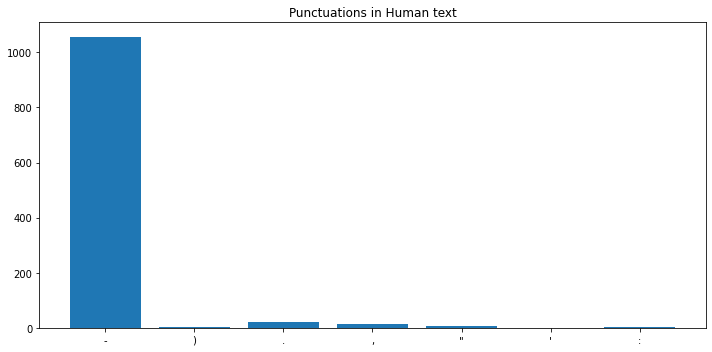

In [9]:
plt.figure(figsize=(10,5))
dic=defaultdict(int)
import string
special = string.punctuation
for i in (human_corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)
plt.title("Punctuations in Human text")
plt.tight_layout()

In [10]:
humanPunctuations= list(dic.keys())
humanPunctuations

['-', ')', '.', ',', '"', "'", ':']

Checking Punctuations in Machine Text

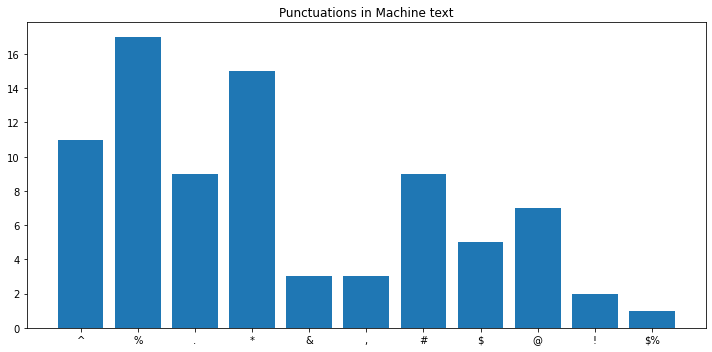

In [11]:
plt.figure(figsize=(10,5))

dic=defaultdict(int)
import string
special = string.punctuation
for i in (machine_corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)
plt.title("Punctuations in Machine text")
plt.tight_layout()

In [12]:
machinePunctuations= [k for k in list(dic.keys()) if k not in ['.',','] ]
machinePunctuations

['^', '%', '*', '&', '#', '$', '@', '!', '$%']

#Adding more features

###punctuation count

In [13]:
import string
def count_punc(text):
  words= text.split()
  count=0
  for w in words:
    for c in w:
      if c in string.punctuation:
        count+=1
  return count

In [14]:
human_data['punctuations']= human_data['text'].apply(lambda x:count_punc(x) )
machine_data['punctuations']= machine_data['text'].apply(lambda x:count_punc(x) )

In [15]:
machine_data.head()

,text,label,punctuations
0,Np^g tj5vQ key NKVZl31 ZV,0,1
1,EcN !d7g moTL!3c* e^n qsG page l0u,0,4
2,@@rvbv 5r gYXWL police nVV8 RZD.fV&2n Jc0 EQ2iX,0,4
3,"pZ80yue ^ difference 8Z8Z i VhK,Tn Mqj!RpIy",0,3
4,bKQIM@v jd3D6nnK qlru9 administration c XhM%A6...,0,2


###Number of alphanumerics

In [16]:
def count_alpha(text):
  words= text.split()
  count=0
  for w in words:
    if w.isalpha():
        count+=1
  return count

In [17]:
human_data['alphaNum']= human_data['text'].apply(lambda x:count_alpha(x) )
machine_data['alphaNum']= machine_data['text'].apply(lambda x:count_alpha(x) )

In [18]:
machine_data

,text,label,punctuations,alphaNum
0,Np^g tj5vQ key NKVZl31 ZV,0,1,2
1,EcN !d7g moTL!3c* e^n qsG page l0u,0,4,3
2,@@rvbv 5r gYXWL police nVV8 RZD.fV&2n Jc0 EQ2iX,0,4,2
3,"pZ80yue ^ difference 8Z8Z i VhK,Tn Mqj!RpIy",0,3,2
4,bKQIM@v jd3D6nnK qlru9 administration c XhM%A6...,0,2,2
...,...,...,...,...
495,D popular %dL84N3w,0,1,2
496,#$hAlw4 jN s0P#V% manager w,0,4,3
497,"2D color &Ww l, !VA*!Cy",0,5,1
498,wO!& time y,0,2,2


###Words with special chars

In [19]:
def count_puncWords(text):
  words= text.split()
  wordCount=0
  # print(words)
  for w in words:
    count=0
    for c in w:
      if c in machinePunctuations:
        count=count+1
    if count>=1:
      wordCount+=1
  return wordCount

In [20]:
human_data['specialWords']= human_data['text'].apply(lambda x:count_puncWords(x) )
machine_data['specialWords']= machine_data['text'].apply(lambda x:count_puncWords(x) )

In [21]:
machine_data.head()

,text,label,punctuations,alphaNum,specialWords
0,Np^g tj5vQ key NKVZl31 ZV,0,1,2,1
1,EcN !d7g moTL!3c* e^n qsG page l0u,0,4,3,3
2,@@rvbv 5r gYXWL police nVV8 RZD.fV&2n Jc0 EQ2iX,0,4,2,2
3,"pZ80yue ^ difference 8Z8Z i VhK,Tn Mqj!RpIy",0,3,2,2
4,bKQIM@v jd3D6nnK qlru9 administration c XhM%A6...,0,2,2,2


###Count of numbers

In [22]:
def count_numbers(text):
  words= text.split()
  count=0
  for w in words:
    for c in w:
      if c.isnumeric():
        count+=1
  return count


In [23]:
human_data['countNums']= human_data['text'].apply(lambda x:count_numbers(x) )
machine_data['countNums']= machine_data['text'].apply(lambda x:count_numbers(x) )

In [24]:
human_data.head()

,text,label,punctuations,alphaNum,specialWords,countNums
0,Grease Monkey's current market,1,1,3,0,0
1,"Schlumberger's management shift, asset restruc...",1,5,6,0,0
2,enough to ease the trade deficit's drag on the...,1,4,8,0,0
3,"against a targeted 1.6 billion, official figur...",1,3,5,0,2
4,Chancellor of the Exchequer Nigel,1,0,5,0,0


#Pre-processing and Cleaning

In [25]:
#Removing Punctuations
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [26]:
machine_data['text']=machine_data['text'].apply(lambda x : remove_punct(x))
human_data['text']=human_data['text'].apply(lambda x : remove_punct(x))

In [27]:
# Applying stemming
porter = PorterStemmer()
def stem(text):
  tokens = word_tokenize(text)
  stemmed = [porter.stem(word) for word in tokens]
  return " ".join(stemmed)

In [ ]:
# machine_data['text']=machine_data['text'].apply(lambda x : stem(x))
# human_data['text']=human_data['text'].apply(lambda x : stem(x))

Creating a DataFrame with both Machine and Human text

In [28]:
data=pd.concat([machine_data,human_data],axis=0,ignore_index=True)
data.head()

,text,label,punctuations,alphaNum,specialWords,countNums
0,Npg tj5vQ key NKVZl31 ZV,0,1,2,1,3
1,EcN d7g moTL3c en qsG page l0u,0,4,3,3,3
2,rvbv 5r gYXWL police nVV8 RZDfV2n Jc0 EQ2iX,0,4,2,2,5
3,pZ80yue difference 8Z8Z i VhKTn MqjRpIy,0,3,2,2,4
4,bKQIMv jd3D6nnK qlru9 administration c XhMA6jS...,0,2,2,2,5


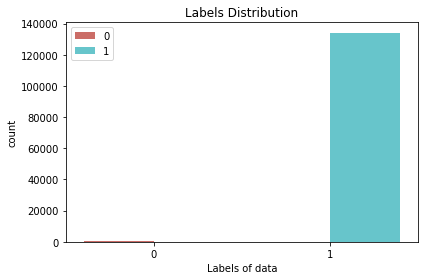

In [29]:
sns.countplot(x=data['label'], palette='hls',hue=data['label'])
plt.xlabel("Labels of data")
plt.legend()
plt.title("Labels Distribution")
plt.tight_layout()

# TF-IDF Vectors as features

###Character tokenizer with TFIDF

In [30]:
tfidf=TfidfVectorizer( ngram_range=(1,2),max_features=10000,analyzer="char")
data_tf =  tfidf.fit_transform(data['text'])

###Adding extracted features to data

In [31]:
#Dense to sparse matrix convertion
def dense_to_sparse(data,feature):
  return scipy.sparse.csc_matrix(data[feature].values.reshape(-1,1))

In [32]:
import scipy
from scipy.sparse import csc_matrix, hstack
from sklearn.preprocessing import StandardScaler

In [33]:
data_new= hstack([data_tf,
                     dense_to_sparse(data,'punctuations'),
                     dense_to_sparse(data,'specialWords'),
                     dense_to_sparse(data,'alphaNum'),
                  dense_to_sparse(data,'countNums')])

In [34]:
data_new.shape

(134609, 1477)

#Train Test Split

In [35]:
X,X_test,y,y_test=train_test_split(data_new,data['label'].values,test_size=0.15)
print('Shape of Train',X.shape)
print('y Unbalanced Labels',np.bincount(y))
print("Shape of Test ",X_test.shape)
print('Test Unbalanced Labels',np.bincount(y_test))

Shape of Train (114417, 1477)
y Unbalanced Labels [   425 113992]
Shape of Test  (20192, 1477)
Test Unbalanced Labels [   75 20117]


In [37]:
X_train_imbal,X_val,y_train_imbal,y_val=train_test_split(X,y,test_size=0.15)
print('Shape of Train',X_train_imbal.shape)
print('Train Unbalanced Labels',np.bincount(y_train_imbal))
print("Shape of Validation ",X_val.shape)
print('Validation Unbalanced Labels',np.bincount(y_val))

Shape of Train (97254, 1477)
Train Unbalanced Labels [  368 96886]
Shape of Validation  (17163, 1477)
Validation Unbalanced Labels [   57 17106]


#SMOTE on Train data

In [38]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
# transform the dataset
oversample = SMOTE(kind='regular',k_neighbors=2)#make_pipeline(RandomOverSampler(),   SMOTE())
X_train, y_train = oversample.fit_resample(X_train_imbal,y_train_imbal)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [39]:
print('Train after Resampling Labels',np.bincount(y_train))
print('Shape of Train',X_train.shape)

Train after Resampling Labels [96886 96886]
Shape of Train (193772, 1477)


#Count Vectors as features

In [ ]:
count_vect = CountVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)  
count_vect.fit(data['text'])

# transform the training and validation data using count vectorizer object
X_train_count =  count_vect.transform(X_train)
X_val_count =  count_vect.transform(X_val)
X_test_count =  count_vect.transform(X_test)
print(X_train_count.shape,X_val_count.shape,X_test_count.shape)

#Base Model - LogisticRegression

In [40]:
lr= LogisticRegression(C=10)
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
lr.score(X_train, y_train)

0.9999741964783354

In [42]:
print(lr.score(X_val,y_val))
y_pred= lr.predict(X_val)
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

0.9995921458952398
[[   55     2]
 [    5 17101]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        57
           1       1.00      1.00      1.00     17106

    accuracy                           1.00     17163
   macro avg       0.96      0.98      0.97     17163
weighted avg       1.00      1.00      1.00     17163



In [43]:
print(lr.score(X_test,y_test))
y_pred= lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9994552297939778
[[   69     6]
 [    5 20112]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        75
           1       1.00      1.00      1.00     20117

    accuracy                           1.00     20192
   macro avg       0.97      0.96      0.96     20192
weighted avg       1.00      1.00      1.00     20192



###GridSearch for LR

In [44]:
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

In [45]:
grid_clf_acc = GridSearchCV(lr, param_grid = grid_values,scoring = 'f1')

In [46]:
grid_clf_acc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=10, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [47]:
grid_clf_acc.best_params_

{'C': 25, 'penalty': 'l2'}

In [48]:
lr_best= LogisticRegression(C=25,penalty='l2')

In [49]:
lr_best.fit(X_train,y_train)
lr_best.score(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9999948392956671

In [50]:
print(lr_best.score(X_val,y_val))
y_pred= lr_best.predict(X_val)
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

0.9996504107673484
[[   55     2]
 [    4 17102]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        57
           1       1.00      1.00      1.00     17106

    accuracy                           1.00     17163
   macro avg       0.97      0.98      0.97     17163
weighted avg       1.00      1.00      1.00     17163



In [51]:
print(lr_best.score(X_test,y_test))
y_pred= lr_best.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9994552297939778
[[   68     7]
 [    4 20113]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        75
           1       1.00      1.00      1.00     20117

    accuracy                           1.00     20192
   macro avg       0.97      0.95      0.96     20192
weighted avg       1.00      1.00      1.00     20192



#Randomforest

In [52]:
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

1.0

In [53]:
print(rf.score(X_val,y_val))
y_pred= rf.predict(X_val)
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

0.9995338810231311
[[   49     8]
 [    0 17106]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        57
           1       1.00      1.00      1.00     17106

    accuracy                           1.00     17163
   macro avg       1.00      0.93      0.96     17163
weighted avg       1.00      1.00      1.00     17163



In [54]:
print(rf.score(X_test,y_test))
y_pred= rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9993561806656102
[[   62    13]
 [    0 20117]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        75
           1       1.00      1.00      1.00     20117

    accuracy                           1.00     20192
   macro avg       1.00      0.91      0.95     20192
weighted avg       1.00      1.00      1.00     20192



###GridSearch For RF

In [55]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}#,
              #  'min_samples_leaf': min_samples_leaf,
              #  'bootstrap': bootstrap}

In [56]:
grid_rf = GridSearchCV(rf, param_grid = random_grid,scoring = 'f1',n_jobs=1,verbose=1)

In [ ]:
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
grid_rf.best_estimator_.fit(X_train,y_train)

AttributeError: ignored

In [ ]:
grid_rf.best_estimator_.score(X_train,y_train)

#Other

Generic Method for metrics calculations

In [ ]:
def get_metrics(true_labels, predicted_labels,display=False):
    accuracy=np.round(accuracy_score(true_labels,predicted_labels),4)
    precision=np.round(precision_score(true_labels, predicted_labels,average='macro'),4)
    recall=np.round(recall_score(true_labels,predicted_labels,average='macro'),4)
    f1_scoreHuman=np.round(f1_score(true_labels,predicted_labels,pos_label=1),4)
    f1_scoreMachine=np.round(f1_score(true_labels,predicted_labels,pos_label=0),4)
    cm = confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
    report = classification_report(y_true=true_labels, y_pred=predicted_labels)
    if display:
      print('Accuracy:',np.round(accuracy_score(true_labels,predicted_labels), 4) )
      print('Precision:', np.round(precision_score(true_labels,predicted_labels,average='macro'),4))
      print('Recall:', np.round(recall_score(true_labels,predicted_labels,average='macro'),4))
      print('F1 Score for Human text(1):', np.round(f1_score(true_labels,predicted_labels,pos_label=1),4))
      print('F1 Score for Machine text(0):', np.round(f1_score(true_labels,predicted_labels,pos_label=0),4))
      print(cm)
      print(report)
    return accuracy,precision,recall,f1_scoreHuman,f1_scoreMachine

Method for Training a given model

In [ ]:
def predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels,display=False):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    accuracy,precision,recall,f1_scoreHuman,f1_scoreMachine = get_metrics(test_labels,predictions,display)
    return accuracy,precision,recall,f1_scoreHuman,f1_scoreMachine

Method for Comparing different Models 

In [ ]:
def compare_models(model_list,model_names,train_features,train_labels,test_features,test_labels):
  accuracies=[]
  precisions=[]
  recalls=[]
  f1_scoresHumanTexts=[]
  f1_scoresMachineTexts=[]

  for model in model_list:
    accuracy,precision,recall,f1_scoresHumanText,f1_scoresMachineText= predict_model(model,train_features,train_labels,test_features,test_labels)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scoresHumanTexts.append(f1_scoresHumanText)
    f1_scoresMachineTexts.append(f1_scoresMachineText)
  draw_performance_graphs(model_names,accuracies,precisions,recalls,f1_scoresHumanTexts,f1_scoresMachineTexts)

Method for drawing performance graphs of different models

In [ ]:
def draw_performance_graphs(model_list,accuracies,precisions,recalls,f1_scoresHumanText,f1_scoresMachineText):
  fig, axes = plt.subplots(1,5,figsize=(16,5))
  sns.barplot(x=model_list, y=accuracies,ax=axes[0])
  sns.barplot(x=model_list, y=precisions,ax=axes[1])
  sns.barplot(x=model_list, y=recalls,ax=axes[2])
  sns.barplot(x=model_list, y=f1_scoresHumanText,ax=axes[3])
  sns.barplot(x=model_list, y=f1_scoresMachineText,ax=axes[4])
  axes[0].set_title('Accuracy scores')
  axes[1].set_title('Precision')
  axes[2].set_title('Recall')
  axes[3].set_title('F1-Score HumanText')
  axes[4].set_title('F1-Score MachineText')
  plt.tight_layout()

#Model performances with CountVectorizer encodings 
Tested models are : Logistic Regression, Naive Bayes Classifier, DecisionTree, RandomForest, GradientBoosting, Extreme Gradient Boosting

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


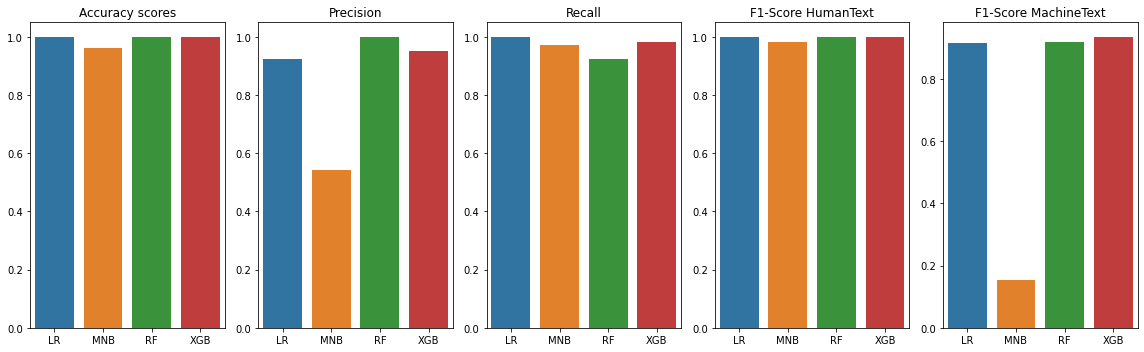

In [ ]:
base_models=[LogisticRegression(C=25, penalty='l2', max_iter=1000),MultinomialNB(),RandomForestClassifier(),XGBClassifier(n_estimators=100)]
base_models_names=['LR','MNB','RF','XGB']
compare_models(base_models,base_models_names,X_train,y_train,X_val,y_val)

Since the dataset is imbalanced. Model always predicts new data as the majority class and accuracy is not a good metric to judge the model so I have plotted Precision recall and finally F1 Score for all the models. From the above graph we can see that F1 score for Machine Text is high for XGBClassifier so let's test its performance,classification report and confusion matrix on both Validation and Test Data.

In [ ]:
xgb= XGBClassifier(n_estimators=100)
xgb.fit(X_train,y_train)
xgb.score(X_train,y_train)

0.9999174253215252

In [ ]:
print(xgb.score(X_val,y_val))
y_pred= xgb.predict(X_val)
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

0.9995338810231311
[[   58     2]
 [    6 17097]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        60
           1       1.00      1.00      1.00     17103

    accuracy                           1.00     17163
   macro avg       0.95      0.98      0.97     17163
weighted avg       1.00      1.00      1.00     17163



In [ ]:
print(xgb.score(X_test,y_test))
y_pred= xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9995047543581617
[[   64     4]
 [    6 20118]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        68
           1       1.00      1.00      1.00     20124

    accuracy                           1.00     20192
   macro avg       0.96      0.97      0.96     20192
weighted avg       1.00      1.00      1.00     20192



In [ ]:
# Predicting the model performance on Test data
print("Naive Bayes Validation data scores and Confusion matrix")
predict_model(XGBClassifier(n_estimators=100),X_train,y_train,X_val,y_val,True)
# Predicting the model performance on Test data using tfidf
print("Naive Bayes Test data scores and Confusion matrix")
predict_model(XGBClassifier(n_estimators=100),X_train,y_train,X_test,y_test,True)

#Model Performances with TFIDF word encodings
Tested models : Logistic Regression, Naive Bayes Classifier, DecisionTree, RandomForest, GradientBoosting, Extreme Gradient Boosting

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetr

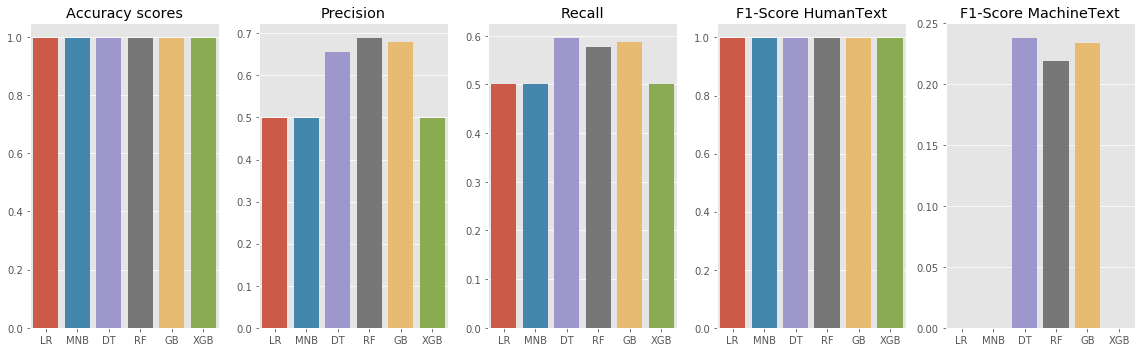

In [ ]:
base_models=[LogisticRegression(),MultinomialNB(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier(n_estimators=100)]
base_models_names=['LR','MNB','DT','RF','GB','XGB']
compare_models(base_models,base_models_names,X_train_tf,y_train,X_val_tf,y_val)

TFIDF acheived High f1 scores for Tree based models(except XGBoost) but still the f1 score for count encoded Naive Bayes has good score(0.72) compared to these(around 0.20). Now let's check on Deep Learning models

#Deep Learning Models with Tranfer learning pre embeddings GloVe

Method for training Deep Learning models

In [ ]:
def predict_deep_learning_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels,display=False):
    # build model    
    classifier.fit(train_features, train_labels,epochs=5)
    # predict using model
    predictions = classifier.predict(test_features)
    predictions=np.around(predictions,decimals=1).astype(int) 
    get_metrics(test_labels,predictions,True)

Creating corpus from whole data

In [ ]:
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word.lower() not in stop))]
        corpus.append(words)
    return corpus

In [ ]:
corpus=create_corpus(data)

100%|██████████| 134609/134609 [00:15<00:00, 8940.08it/s]


Tokenizing the corpus

In [ ]:
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

data_encoded=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

Train Test Split for Deep Learning models

In [ ]:
X_deep,X_test_deep,y_deep,y_test_deep=train_test_split(data_encoded,data['label'].values,test_size=0.15)
print('Shape of Train',X_deep.shape)
print("Shape of Test ",X_test_deep.shape)

Shape of Train (114417, 50)
Shape of Test  (20192, 50)


In [ ]:
X_train_deep,X_val_deep,y_train_deep,y_val_deep=train_test_split(X_deep,y_deep,test_size=0.15)
print('Shape of Train',X_train_deep.shape)
print("Shape of Validation ",X_val_deep.shape)

Shape of Train (97254, 50)
Shape of Validation  (17163, 50)


###SMOTE on Train

In [ ]:
np.bincount(y_train_deep)

array([  357, 96897])

In [ ]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
# transform the dataset
oversample = SMOTE(kind='regular',k_neighbors=2)#make_pipeline(RandomOverSampler(),   SMOTE())
X_train_deep, y_train_deep = oversample.fit_resample(X_train_deep,y_train_deep)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
np.bincount(y_train_deep)

array([96888, 96888])

Number Unique words from Tokenizer

In [ ]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 35475


Loading GloVe vectors 100Dimensions

In [ ]:
embedding_dict={}
with open('glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [ ]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|██████████| 35475/35475 [00:00<00:00, 563389.79it/s]


# Convultional Neural Network

In [ ]:
import keras.backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
def create_cnn():
  model = Sequential()
  model.add(Embedding(len(word_index)+1,100, input_length=MAX_LEN,weights=[embedding_matrix],trainable=False))
  model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=Adam(), loss='binary_crossentropy',metrics=[get_f1])
    
  return model

In [ ]:
model_cnn = create_cnn()
predict_deep_learning_model(model_cnn,X_train_deep,y_train_deep,X_val_deep,y_val_deep)

Epoch 1/5
193776/193776 [==============================] - 44s 229us/step - loss: 0.1579 - get_f1: 0.9357
Epoch 2/5
193776/193776 [==============================] - 44s 225us/step - loss: 0.1230 - get_f1: 0.9494
Epoch 3/5
193776/193776 [==============================] - 44s 226us/step - loss: 0.1109 - get_f1: 0.9545
Epoch 4/5
193776/193776 [==============================] - 45s 233us/step - loss: 0.1033 - get_f1: 0.9574
Epoch 5/5
193776/193776 [==============================] - 45s 234us/step - loss: 0.0976 - get_f1: 0.9599
Accuracy: 0.8662
Precision: 0.5117
Recall: 0.9329
F1 Score for Human text(1): 0.928
F1 Score for Machine text(0): 0.0457
[[   55     0]
 [ 2297 14811]]
              precision    recall  f1-score   support

           0       0.02      1.00      0.05        55
           1       1.00      0.87      0.93     17108

    accuracy                           0.87     17163
   macro avg       0.51      0.93      0.49     17163
weighted avg       1.00      0.87      0.93   

CNN model didn't perform well on this data. F1 score for Machine text is still low

#Recurrent Neural Network – LSTM

In [ ]:
def create_rnn():
  model = Sequential()
  model.add(Embedding(len(word_index)+1,100, input_length=MAX_LEN,weights=[embedding_matrix],trainable=False))
  model.add(SpatialDropout1D(0.2))
  model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=Adam(), loss='binary_crossentropy',metrics=[get_f1])
    
  return model

In [ ]:
model_rnn = create_rnn()
predict_deep_learning_model(model_rnn,X_train_deep,y_train_deep,X_val_deep,y_val_deep)

Epoch 1/5
193776/193776 [==============================] - 196s 1ms/step - loss: 0.2311 - get_f1: 0.9064
Epoch 2/5
193776/193776 [==============================] - 196s 1ms/step - loss: 0.1712 - get_f1: 0.9318
Epoch 3/5
193776/193776 [==============================] - 194s 1ms/step - loss: 0.1535 - get_f1: 0.9384
Epoch 4/5
193776/193776 [==============================] - 190s 979us/step - loss: 0.1462 - get_f1: 0.9411
Epoch 5/5
193776/193776 [==============================] - 189s 975us/step - loss: 0.1407 - get_f1: 0.9434
Accuracy: 0.8405
Precision: 0.5098
Recall: 0.92
F1 Score for Human text(1): 0.9131
F1 Score for Machine text(0): 0.0386
[[   55     0]
 [ 2737 14371]]
              precision    recall  f1-score   support

           0       0.02      1.00      0.04        55
           1       1.00      0.84      0.91     17108

    accuracy                           0.84     17163
   macro avg       0.51      0.92      0.48     17163
weighted avg       1.00      0.84      0.91     

LSTM also didn't perform well on this Data. F1 score is still low

#ROC Curve for Naive Bayes model

In [ ]:
def draw_roc_curve(true_labels,predicted_labels):
  fig, axes = plt.subplots(figsize=(16,5))
  fpr,tpr,thresholds= roc_curve(true_labels,predicted_labels )
  plt.plot (fpr,tpr,label='ROC Curve')
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  close_zero=np.argmin(np.abs(thresholds))
  plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize=10,label='zero threshold',fillstyle="none",c='k',mew=2)
  plt.legend(loc=4)
  plt.title("ROC Curve for NaiveBayes")

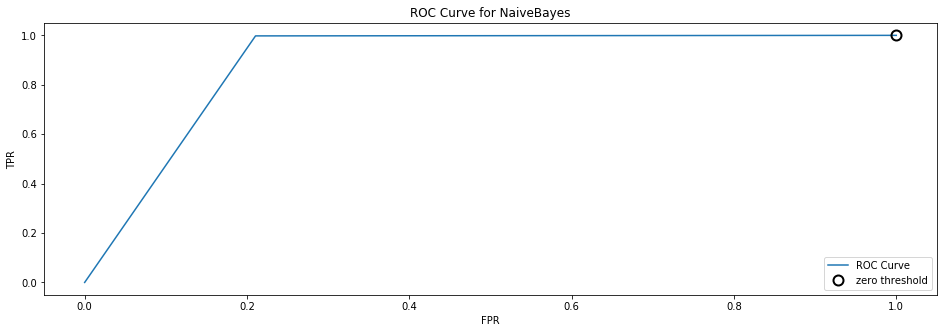

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train_count,y_train)
y_pred= mnb.predict(X_val_count)
draw_roc_curve(y_val,y_pred)

#Precision Recall Curve for Naive Bayes

In [ ]:
def draw_precision_recall_curve(true_labels,predicted_labels):
  fig, axes = plt.subplots(figsize=(16,5))
  precision, recall, thresholds = precision_recall_curve(true_labels, predicted_labels)
  close_zero=np.argmin(np.abs(thresholds))
  plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label='zero threshold',fillstyle="none",c='k',mew=2)
  plt.plot(precision,recall,label='precision recall curve')
  plt.xlabel("Precision")
  plt.ylabel("recall")
  plt.legend(loc=4)
  plt.title("Precision Recall Curve for Naive Bayes")

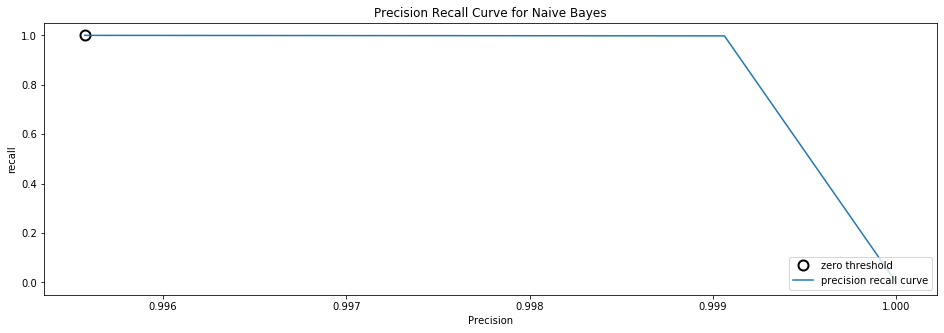

In [ ]:
draw_precision_recall_curve(y_val,y_pred)